In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from milligrad import Module, Linear, Sequential, ReLU, SGD, CrossEntropyLoss


random_seed = 42
random.seed(random_seed)

In [2]:
images, labels = load_digits(return_X_y=True)
images.shape, labels.shape

((1797, 64), (1797,))

In [3]:
images.max(), labels.max()

(np.float64(16.0), np.int64(9))

In [4]:
images[0], images[0].shape

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 (64,))

In [5]:
labels[0], labels[0].shape

(np.int64(0), ())

<Figure size 640x480 with 0 Axes>

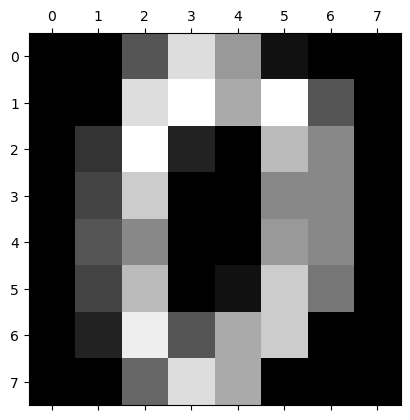

In [6]:
plt.gray()
plt.matshow(images[0].reshape(8,8))
plt.show()

In [7]:
images_normalized = images / 16.0
images_normalized[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [8]:
labels_reshaped = labels.reshape(-1, 1)
labels_reshaped[0]

array([0])

In [9]:
ohe = OneHotEncoder()
y_onehot = ohe.fit_transform(labels_reshaped).toarray()
y = y_onehot.tolist()
X = images_normalized.tolist()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, test_size=0.2)

In [11]:
def multiclass_accuracy(predictions, y_true):
    return np.mean(np.argmax(predictions, axis=1) == np.argmax(y_true, axis=1))

In [12]:
class MyNN(Module):
    def __init__(self):
        super().__init__()
        self.sequential = Sequential(
            Linear(8*8, 32),
            ReLU(),
            Linear(32, 10),
        )
    def forward(self, inputs):
        return self.sequential(inputs)

In [13]:
model = MyNN()

In [14]:
loss_fn = CrossEntropyLoss()

In [15]:
optimizer = SGD(
    model.parameters(),
    lr=5e-3,
    momentum=0.8
)

In [16]:
epoches = 14
epoch_losses = {'train': [], 'test': []}
epoch_metrics = {'train_acc': [], 'test_acc': []}

In [17]:
for i, epoch in enumerate(range(epoches), 1):
    print(f'--- Epoch {i} ---')
    if i % 6 == 0:
        optimizer.lr = optimizer.lr/2
        print(f'Changed learning rate to: {optimizer.lr}')
    train_losses = []
    test_losses = []
    train_preds = []
    test_preds = []
    for image, target_label in tqdm(list(zip(X_train, y_train))):

        pred = model(image)
        loss = loss_fn(pred, target_label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.data)
        train_preds.append([val.data for val in pred])

    mean_train_loss = np.mean(train_losses)
    train_acc = multiclass_accuracy(train_preds, y_train)
    print(f'Mean train loss: {mean_train_loss:.4f}')
    print(f'Train accuracy: {train_acc:.4f}')

    for image, target_label in tqdm(list(zip(X_test, y_test))):

        pred = model(image)
        loss = loss_fn(pred, target_label)

        test_losses.append(loss.data)
        test_preds.append([val.data for val in pred])
        
    mean_test_loss = np.mean(test_losses)
    test_acc = multiclass_accuracy(test_preds, y_test)
    print(f'Mean test loss: {mean_test_loss:.4f}')
    print(f'Test accuracy: {test_acc:.4f}')
    print()

    epoch_losses['train'].append(mean_train_loss)
    epoch_losses['test'].append(mean_test_loss)
    epoch_metrics['train_acc'].append(train_acc)
    epoch_metrics['test_acc'].append(test_acc)

--- Epoch 1 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.30it/s]


Mean train loss: 1.0644
Train accuracy: 0.6987


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.86it/s]


Mean test loss: 0.3303
Test accuracy: 0.9139

--- Epoch 2 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 35.96it/s]


Mean train loss: 0.2541
Train accuracy: 0.9276


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.66it/s]


Mean test loss: 0.2067
Test accuracy: 0.9333

--- Epoch 3 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.12it/s]


Mean train loss: 0.1652
Train accuracy: 0.9506


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.69it/s]


Mean test loss: 0.1703
Test accuracy: 0.9444

--- Epoch 4 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.08it/s]


Mean train loss: 0.1267
Train accuracy: 0.9638


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.57it/s]


Mean test loss: 0.1507
Test accuracy: 0.9528

--- Epoch 5 ---


100%|███████████████████████████████████████| 1437/1437 [00:40<00:00, 35.87it/s]


Mean train loss: 0.1037
Train accuracy: 0.9736


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.71it/s]


Mean test loss: 0.1435
Test accuracy: 0.9528

--- Epoch 6 ---
Changed learning rate to: 0.0025


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.20it/s]


Mean train loss: 0.0750
Train accuracy: 0.9840


100%|█████████████████████████████████████████| 360/360 [00:11<00:00, 30.14it/s]


Mean test loss: 0.1165
Test accuracy: 0.9583

--- Epoch 7 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.55it/s]


Mean train loss: 0.0665
Train accuracy: 0.9847


100%|█████████████████████████████████████████| 360/360 [00:11<00:00, 30.02it/s]


Mean test loss: 0.1121
Test accuracy: 0.9667

--- Epoch 8 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.48it/s]


Mean train loss: 0.0606
Train accuracy: 0.9861


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.87it/s]


Mean test loss: 0.1088
Test accuracy: 0.9667

--- Epoch 9 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.47it/s]


Mean train loss: 0.0555
Train accuracy: 0.9882


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.98it/s]


Mean test loss: 0.1063
Test accuracy: 0.9667

--- Epoch 10 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.55it/s]


Mean train loss: 0.0511
Train accuracy: 0.9896


100%|█████████████████████████████████████████| 360/360 [00:11<00:00, 30.06it/s]


Mean test loss: 0.1042
Test accuracy: 0.9667

--- Epoch 11 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.43it/s]


Mean train loss: 0.0473
Train accuracy: 0.9903


100%|█████████████████████████████████████████| 360/360 [00:11<00:00, 30.14it/s]


Mean test loss: 0.1009
Test accuracy: 0.9694

--- Epoch 12 ---
Changed learning rate to: 0.00125


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.06it/s]


Mean train loss: 0.0405
Train accuracy: 0.9930


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.98it/s]


Mean test loss: 0.0954
Test accuracy: 0.9722

--- Epoch 13 ---


100%|███████████████████████████████████████| 1437/1437 [00:39<00:00, 36.61it/s]


Mean train loss: 0.0386
Train accuracy: 0.9930


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.90it/s]


Mean test loss: 0.0949
Test accuracy: 0.9722

--- Epoch 14 ---


100%|███████████████████████████████████████| 1437/1437 [00:40<00:00, 35.53it/s]


Mean train loss: 0.0370
Train accuracy: 0.9930


100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 29.24it/s]

Mean test loss: 0.0949
Test accuracy: 0.9722



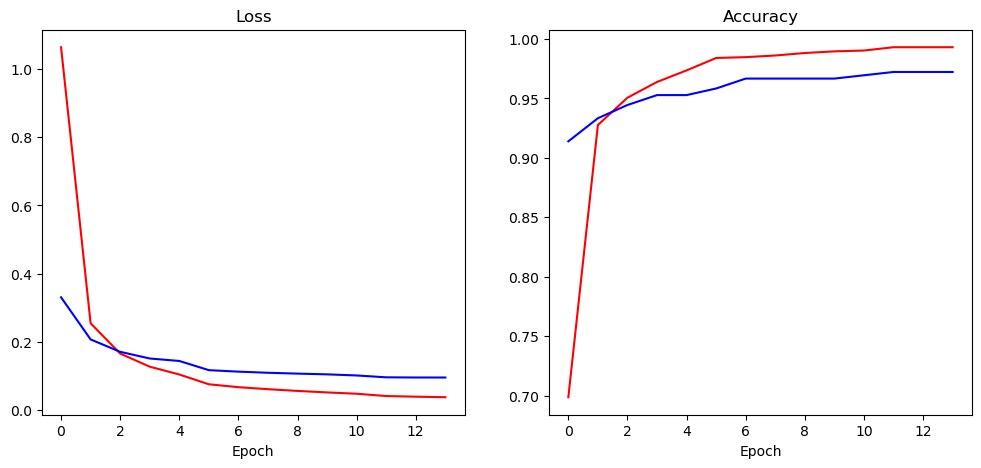

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(epoch_losses['train'], 'r',
            epoch_losses['test'], 'b')
axs[0].set_title('Loss')
axs[1].plot(epoch_metrics['train_acc'], 'r',
            epoch_metrics['test_acc'], 'b')
axs[1].set_title('Accuracy')

for ax in axs.flat:
    ax.set(xlabel='Epoch')
